In [3]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import numpy as np
import pandas as pd
import os
import itertools
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\mahita
[nltk_data]     samant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\mahita
[nltk_data]     samant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\mahita
[nltk_data]     samant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
tweets_df = pd.read_csv(r"C:\Users\mahita samant\OneDrive\Desktop\Sentiment Analysis\tweetdfsiliconvb275t.csv", encoding='latin-1')
tweets_df.head()
print(tweets_df.shape)

(279803, 7)


c:\users\mahita samant\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
print(tweets_df.head())

  Unnamed: 0                       date            id  \
0          0  2023-04-03 23:57:12+00:00  1.643040e+18   
1          1  2023-04-03 23:56:59+00:00  1.643040e+18   
2          2  2023-04-03 23:51:19+00:00  1.643040e+18   
3          3  2023-04-03 23:47:54+00:00  1.643040e+18   
4          4  2023-04-03 23:46:25+00:00  1.643040e+18   

                                               tweet        username  \
0  The Biden administration, placing blame on Tru...  TiffinOhioNews   
1  @1Nicdar With a quick call to his Washington d...      DennisDhg2   
2  From risky investments to lack of regulatory o...   worklife_news   
3  Boxed bankruptcy could be blamed on Silicon Va...  ChambaAnthony1   
4  Your money isnât safe in banks. They donât...      mzarifzeek   

   likecount  retweetcount  
0        0.0           0.0  
1        0.0           0.0  
2        3.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:
tweets_df = tweets_df.drop_duplicates(subset=['tweet'], keep='first')
print(tweets_df.shape)

(275313, 7)


In [8]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(tweets_df)

,Unnamed: 0,date,id,tweet,username,likecount,retweetcount
Total,1,1,1,1,13,13,13
Percent,0.000363223,0.000363223,0.000363223,0.000363223,0.0047219,0.0047219,0.0047219
Types,object,object,float64,object,object,float64,float64


In [9]:
tweets_df=tweets_df.dropna()
print(tweets_df.shape)

(275300, 7)


In [10]:
tweets_df=tweets_df[tweets_df['likecount']!=0]

In [11]:
tweets_df.describe()

,id,likecount,retweetcount
count,1.153390e+05,115339.000000,115339.000000
mean,1.635733e+18,50.754567,13.039189
std,1.678638e+15,579.587656,178.634731
min,1.630720e+18,1.000000,0.000000
25%,1.634650e+18,1.000000,0.000000
50%,1.635250e+18,3.000000,1.000000
75%,1.636030e+18,11.000000,3.000000
max,1.643040e+18,75946.000000,39385.000000


In [12]:

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        if data[col].dtype != 'object' or isinstance(data[col].iloc[0], dict):
            unique = np.nan
        else:
            unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return np.transpose(tt)

unique_values(tweets_df)

,Unnamed: 0,date,id,tweet,username,likecount,retweetcount
Total,115339.0,115339.0,115339.0,115339.0,115339.0,115339.0,115339.0
Uniques,115339.0,104160.0,NaN,115339.0,61902.0,NaN,NaN


In [13]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(tweets_df)

,Unnamed: 0,date,id,tweet,username,likecount,retweetcount
Total,115339,115339,115339,115339,115339,115339,115339
Most frequent item,206344,2023-03-13 13:02:32+00:00,1.63424e+18,Biden announces bailout for wealthy depositors...,business,1,0
Frequence,1,10,1259,1,463,39077,54007
Percent from total,0.001,0.009,1.092,0.001,0.401,33.88,46.825


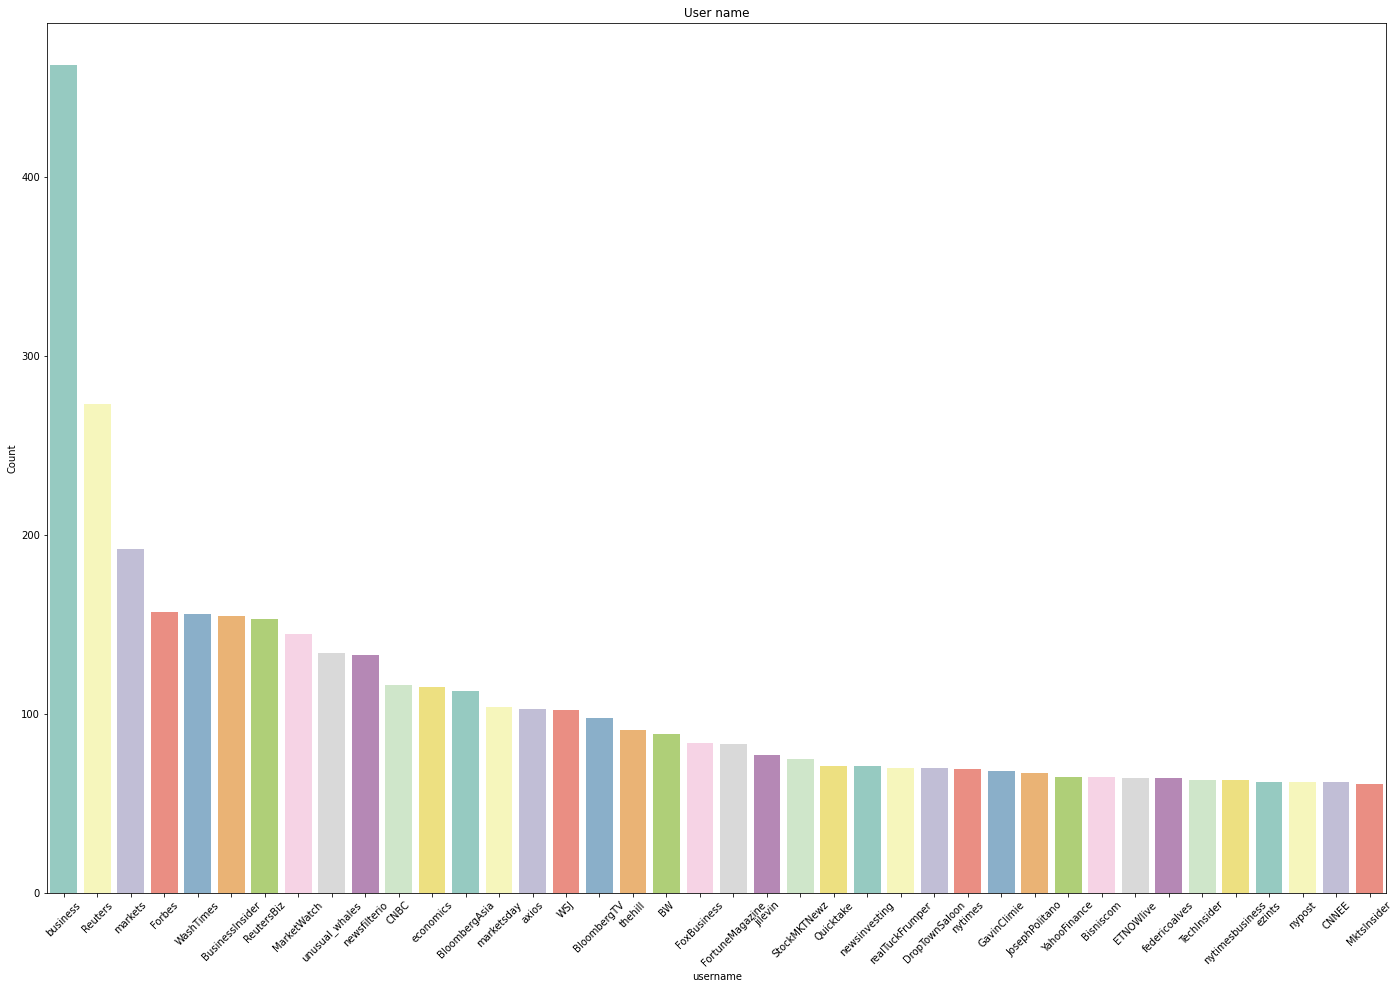

In [14]:
# Function to plot count using seaborn
def plot_count(feature, title, df, size=1.5):
    plt.figure(figsize=(size*6, size*4))
    total = float(len(df))
    counts = df[feature].value_counts().sort_values(ascending=False)[:40]
    g = sns.barplot(x=counts.index, y=counts.values, palette='Set3')
    g.set_title(title)
    g.set_xlabel(feature)  # Label for x-axis
    g.set_ylabel("Count")  # Label for y-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.show()

# Example usage of the plot_count function
plot_count("username", "User name", tweets_df, 4)

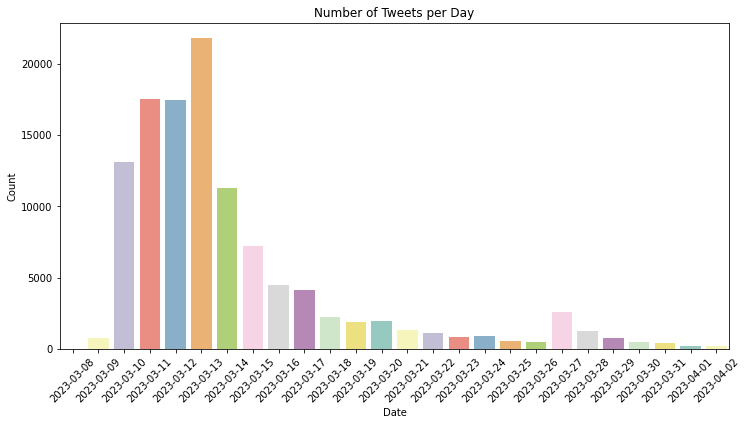

In [15]:

tweets_df['date'] = pd.to_datetime(tweets_df['date'])
filtered_df = tweets_df[(tweets_df['date'] <= '2023-04-03') & (tweets_df['date'] >= '2023-03-08')  ]
tweet_counts = filtered_df['date'].dt.date.value_counts().sort_index(ascending=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=tweet_counts.index, y=tweet_counts.values, palette='Set3')
plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

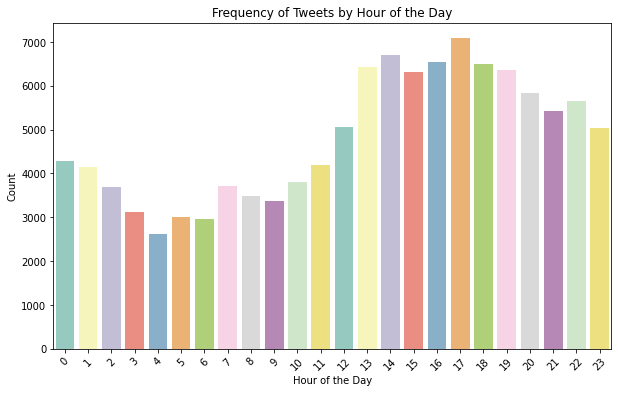

In [16]:
# Convert 'date' column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Extract hour from the 'date' column
tweets_df['hour'] = tweets_df['date'].dt.hour

# Get count of tweets for each hour
tweet_counts = tweets_df['hour'].value_counts().sort_index()

# Plot frequency of tweets by hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x=tweet_counts.index, y=tweet_counts.values, palette='Set3')
plt.title('Frequency of Tweets by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

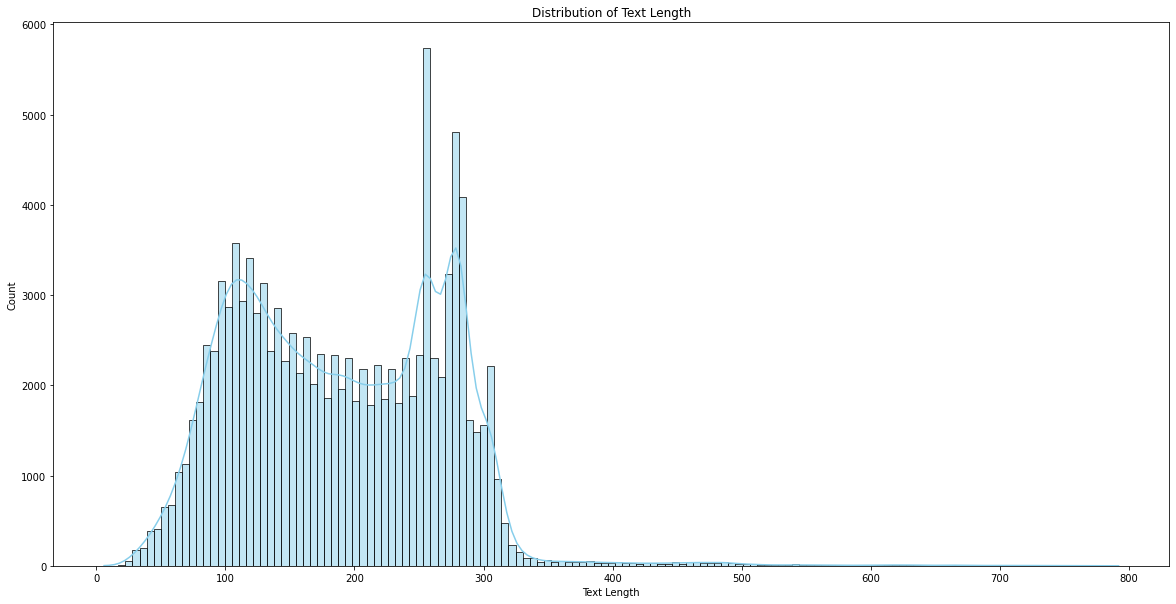

In [17]:
# Calculate the length of each tweet's text
tweets_df['text_length'] = tweets_df['tweet'].str.len()

# Plot the histogram of text length
plt.figure(figsize=(20, 10))
sns.histplot(data=tweets_df, x='text_length', kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [20]:
# Apply VADER sentiment analysis
sia = SentimentIntensityAnalyzer()
tweets_df['sentiment_score'] = tweets_df['tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Extract the sentiment scores as features
X = tweets_df['sentiment_score'].values.reshape(-1, 1)

# Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
tweets_df['sentiment'] = kmeans.fit_predict(X)


In [27]:
# Assign labels based on sentiment scores
tweets_df['sentiment_label'] = 'neutral'
tweets_df.loc[tweets_df['sentiment_score'] > 0, 'sentiment_label'] = 'positive'
tweets_df.loc[tweets_df['sentiment_score'] < 0, 'sentiment_label'] = 'negative'


In [23]:
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [28]:
print(tweets_df.head())

   Unnamed: 0                      date            id  \
2           2 2023-04-03 23:51:19+00:00  1.643040e+18   
6           6 2023-04-03 23:45:01+00:00  1.643040e+18   
9           9 2023-04-03 23:23:04+00:00  1.643030e+18   
10         10 2023-04-03 23:20:00+00:00  1.643030e+18   
11         11 2023-04-03 23:19:30+00:00  1.643030e+18   

                                                tweet        username  \
2   From risky investments to lack of regulatory o...   worklife_news   
6   #LasMÃ¡sLeÃ­das ð£ï¸ | El rescate de Silico...    PanAmPost_es   
9   @JaystaLee @SuperTalismanCD Well Jesusâs sav...      Cipherella   
10  Through its four-decade history, Silicon Valle...         jacobin   
11  @SenatorTimScott @BankingGOP Uncle Tim, I mean...  Suarez1Pro1977   

    likecount  retweetcount  hour  text_length  sentiment_score  cluster  \
2         3.0           0.0    23          195          -0.8126        2   
6         1.0           2.0    23           83           0.0000   

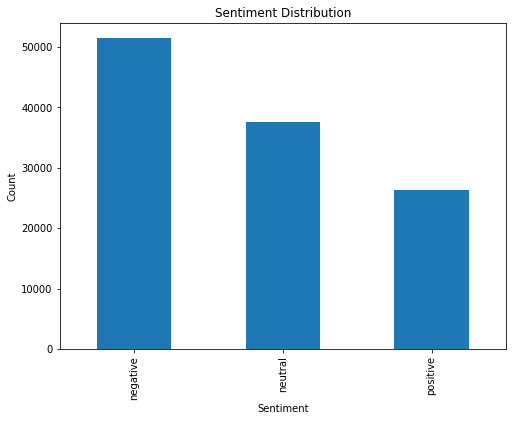

In [30]:
# Sentiment distribution
sentiment_distribution = tweets_df['sentiment_label'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

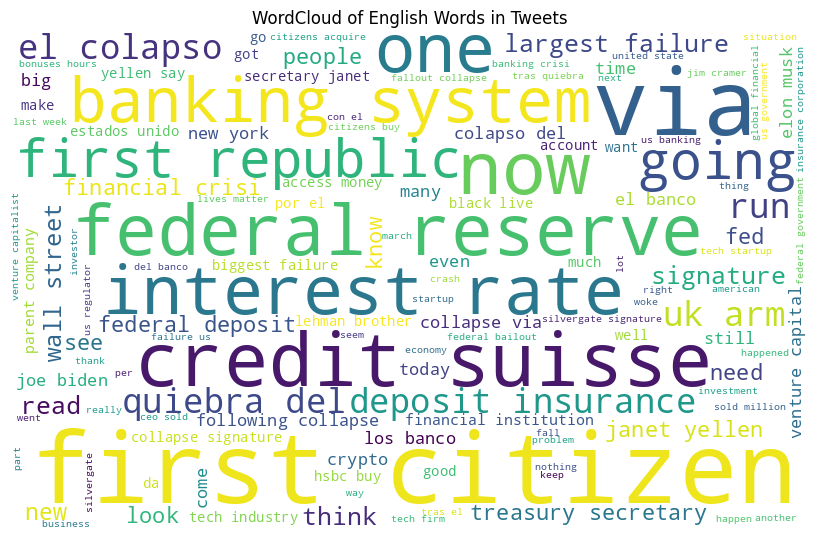

In [40]:
df=tweets_df
# Define the set of excludable words
excludables = set(['https', 't', 'co', 'svb', 'bank', 'silicon', 'valley', 'road', 'bike', 'vintage', 'vintagebikes',
                   'svbcollapse', 'silliconvalleybank', 'banks', 'amp', 'de', 'le', 'u', 'y', 'la', 'que', 'e', 'en',
                   'will', 'siliconvalleybank'])

# Function to check if a word contains only English alphabet characters
def is_english_word(word):
    return bool(re.match('^[a-zA-Z]+$', word))

comment_words = ''
stopwords = set(STOPWORDS)
stopwords |= excludables

# Iterate through the tweets in the dataset
for val in df.tweet:
    val = str(val)
    tokens = val.split()

    # Filter out non-English words and excludable words
    tokens = [token.lower() for token in tokens if is_english_word(token) and token.lower() not in stopwords]

    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=500, background_color='white', stopwords=stopwords, min_font_size=10, font_path='path/to/true_type_font.ttf').generate(comment_words)


# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('WordCloud of English Words in Tweets')
plt.show()